In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [53]:
df = pd.read_csv('Placement_Data_Full_Class.csv')
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [54]:
df.isna().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [55]:
salary_mean = df['salary'].mean()
salary_std = df['salary'].std()

#### Filling NaN with normal distribution

In [56]:
df['salary'].fillna(np.random.normal(salary_mean, salary_std), inplace = True)

In [57]:
df.isna().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [58]:
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.000000
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.000000
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.000000
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,454018.885341
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.000000
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.000000
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.000000
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.000000


In [59]:
df.drop('sl_no', axis = 1, inplace = True)

In [60]:
df['salary']=df.salary.round()

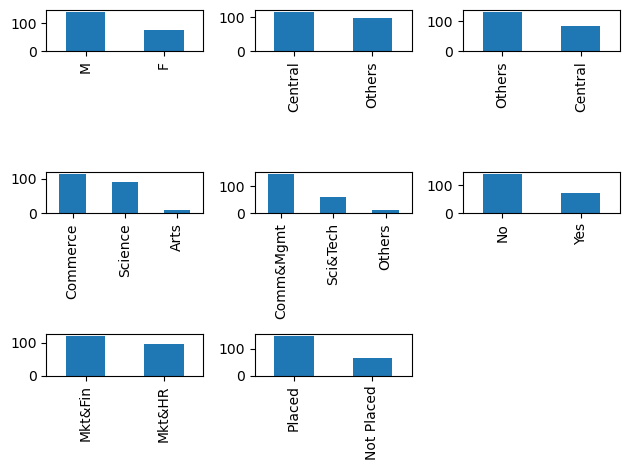

In [61]:
cat_cols = list(df.select_dtypes(["O"]).columns)
for i,col in enumerate(cat_cols):
    ax = plt.subplot(3,3,i+1)
    df[col].value_counts().plot(kind = 'bar', ax = ax)
plt.tight_layout()

In [62]:
df.to_csv('students.csv', index = False)

In [63]:
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,454019.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [64]:
df.drop(['ssc_p', 'hsc_b'], axis = 1, inplace = True)

In [65]:
df

,gender,ssc_b,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,Others,91.00,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,Central,78.33,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,Central,68.00,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,Central,52.00,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,454019.0
4,M,Central,73.60,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,Others,82.00,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,M,Others,60.00,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,M,Others,67.00,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,F,Others,66.00,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [66]:
df['status'].value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

In [67]:
major_spec = ['TMBA', 'SEMBA', 'ME', 'IMMBA', 'PMBA','FMBA','MFE','IMMS','GBP',"EMBA",'DMFBA']
df['majorboy'] = np.random.choice(major_spec, p = [0.08,0.09,0.1,0.07,0.06,0.085,0.115,0.05,0.15,0.095,0.105],size = len(df))

In [68]:
df

,gender,ssc_b,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,majorboy
0,M,Others,91.00,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0,ME
1,M,Central,78.33,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0,ME
2,M,Central,68.00,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0,EMBA
3,M,Central,52.00,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,454019.0,FMBA
4,M,Central,73.60,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0,IMMS
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,Others,82.00,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0,TMBA
211,M,Others,60.00,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0,FMBA
212,M,Others,67.00,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0,PMBA
213,F,Others,66.00,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0,DMFBA


In [69]:
df['majorboy'] = np.random.choice(major_spec, p = [0.08,0.09,0.1,0.07,0.06,0.085,0.115,0.05,0.15,0.095,0.105],size = len(df))

In [70]:
df['majorboy'].value_counts()

GBP      44
ME       23
MFE      22
FMBA     21
EMBA     19
DMFBA    17
SEMBA    17
TMBA     16
IMMBA    16
IMMS     11
PMBA      9
Name: majorboy, dtype: int64

In [71]:
df

,gender,ssc_b,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,majorboy
0,M,Others,91.00,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0,DMFBA
1,M,Central,78.33,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0,GBP
2,M,Central,68.00,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0,EMBA
3,M,Central,52.00,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,454019.0,IMMS
4,M,Central,73.60,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0,GBP
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,Others,82.00,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0,IMMBA
211,M,Others,60.00,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0,DMFBA
212,M,Others,67.00,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0,TMBA
213,F,Others,66.00,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0,EMBA


In [72]:
df_1 = df.groupby(['majorboy', 'status'])[['salary']].agg({'mean','count'}).reset_index()
df_1.columns = df_1.columns.droplevel(1)

In [73]:
df_1.columns = ['major', 'status', 'salary_mean','count']

In [74]:
fig1 = px.bar(df_1, y = 'count', x = 'major', color = 'status', orientation = 'v' ,barmode = 'group')
fig1.update_layout(margin_l = 0, margin_r = 1, legend_x = -1, legend_y = 3)

In [75]:
df_2 = df_1[df_1['status']=='Placed']

In [76]:
px.bar(df_2, y = 'salary_mean', x = 'major',  orientation = 'v' ,barmode = 'group')

In [77]:
df

,gender,ssc_b,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,majorboy
0,M,Others,91.00,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0,DMFBA
1,M,Central,78.33,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0,GBP
2,M,Central,68.00,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0,EMBA
3,M,Central,52.00,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,454019.0,IMMS
4,M,Central,73.60,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0,GBP
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,Others,82.00,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0,IMMBA
211,M,Others,60.00,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0,DMFBA
212,M,Others,67.00,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0,TMBA
213,F,Others,66.00,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0,EMBA


In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def load_data():
    data = pd.read_csv('students.csv')
    return data
df = load_data()

np.random.seed(1)
major_spec = ['TMBA', 'SEMBA', 'ME', 'IMMBA', 'PMBA','FMBA','MFE','IMMS','GBP',"EMBA",'DMFBA']
major_generated = np.random.choice(major_spec, 
    p = [0.08,0.09,0.1,0.07,0.06,0.085,0.115,0.05,0.15,0.095,0.105],
    size = len(df))
# Preprocess

def next_data(df):
    global major_generated
    df = df.drop(['ssc_b', 'hsc_b'], axis = 1)

    column_names=['gender', '10_grade', '12_grade', 'spec_higher_edu',
    'degree_percent','undergrad_major', 'work_exp' ,'employ_test', 
    'post_grad_spec', 'post_grad_percent','status', 'salary' ]
    df.columns = column_names

    df['salary'] = df['salary'].round()
    df['10_grade'] = df['10_grade'].round()
    df['12_grade'] = df['12_grade'].round()
    df['post_grad_percent'] = df['post_grad_percent'].round()
    df['degree_percent'] = df['degree_percent'].round()
    df.drop('post_grad_spec', axis = 1, inplace = True)
    df.loc[df['status']=='Not Placed', 'salary']= 0
    df['department'] = major_generated
    df['gender']=df['gender'].map({'M':'Male', 'F':'Female'})
    return df
dataset = next_data(df=df)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

encoder = OneHotEncoder()
scaler = StandardScaler()
model = RandomForestClassifier()

cols_to_drop = ['spec_higher_edu', '10_grade', '12_grade', 'employ_test', 'post_grad_percent', 'salary']
train = dataset.drop(cols_to_drop, axis = 1)
X = train.drop('status', axis = 1)

In [79]:
y = train['status'].map({'Placed':1,"Not Placed":0})

In [80]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import make_column_transformer

In [81]:
or_encode = OrdinalEncoder()
cat_cols = ['gender', 'undergrad_major', 'work_exp', 'department']

In [82]:
transformer = make_column_transformer((or_encode,cat_cols), 
                                      (scaler, ['degree_percent']), 
                                      remainder = 'passthrough')


In [83]:
from sklearn.pipeline import Pipeline

In [84]:
dt = Pipeline(
    [("preprocessor", transformer),
        ("classifier",model)])

In [85]:
dt.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  ['gender', 'undergrad_major',
                                                   'work_exp', 'department']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['degree_percent'])])),
                ('classifier', RandomForestClassifier())])

In [86]:
dt.named_steps["preprocessor"].transformers_[0][1].categories_

[array(['Female', 'Male'], dtype=object),
 array(['Comm&Mgmt', 'Others', 'Sci&Tech'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['DMFBA', 'EMBA', 'FMBA', 'GBP', 'IMMBA', 'IMMS', 'ME', 'MFE',
        'PMBA', 'SEMBA', 'TMBA'], dtype=object)]

In [87]:
import pickle

In [88]:
pickle.dump(dt, open('model_classifier.pkl', 'wb'))

In [89]:
dataset

,gender,10_grade,12_grade,spec_higher_edu,degree_percent,undergrad_major,work_exp,employ_test,post_grad_percent,status,salary,department
0,Male,67.0,91.0,Commerce,58.0,Sci&Tech,No,55.0,59.0,Placed,270000.0,FMBA
1,Male,79.0,78.0,Science,77.0,Sci&Tech,Yes,86.5,66.0,Placed,200000.0,GBP
2,Male,65.0,68.0,Arts,64.0,Comm&Mgmt,No,75.0,58.0,Placed,250000.0,TMBA
3,Male,56.0,52.0,Science,52.0,Sci&Tech,No,66.0,59.0,Not Placed,0.0,IMMBA
4,Male,86.0,74.0,Commerce,73.0,Comm&Mgmt,No,96.8,56.0,Placed,425000.0,SEMBA
...,...,...,...,...,...,...,...,...,...,...,...,...
210,Male,81.0,82.0,Commerce,78.0,Comm&Mgmt,No,91.0,74.0,Placed,400000.0,PMBA
211,Male,58.0,60.0,Science,72.0,Sci&Tech,No,74.0,54.0,Placed,275000.0,DMFBA
212,Male,67.0,67.0,Commerce,73.0,Comm&Mgmt,Yes,59.0,70.0,Placed,295000.0,ME
213,Female,74.0,66.0,Commerce,58.0,Comm&Mgmt,No,70.0,60.0,Placed,204000.0,SEMBA


In [90]:
from sklearn.ensemble import RandomForestRegressor

In [91]:
regress = dataset[dataset['status']=='Placed']
X_new = regress.drop(['spec_higher_edu', '10_grade', '12_grade', 'employ_test', 'salary', 'status'], axis =1)
y_new = regress['salary']

In [92]:
X_new

,gender,degree_percent,undergrad_major,work_exp,post_grad_percent,department
0,Male,58.0,Sci&Tech,No,59.0,FMBA
1,Male,77.0,Sci&Tech,Yes,66.0,GBP
2,Male,64.0,Comm&Mgmt,No,58.0,TMBA
4,Male,73.0,Comm&Mgmt,No,56.0,SEMBA
7,Male,66.0,Sci&Tech,Yes,62.0,PMBA
...,...,...,...,...,...,...
209,Male,65.0,Comm&Mgmt,No,56.0,DMFBA
210,Male,78.0,Comm&Mgmt,No,74.0,PMBA
211,Male,72.0,Sci&Tech,No,54.0,DMFBA
212,Male,73.0,Comm&Mgmt,Yes,70.0,ME


In [93]:
encoder = OrdinalEncoder()
scaler = StandardScaler()
transformerlar = make_column_transformer((encoder, ['gender', 'undergrad_major', 'work_exp', 'department']),
                                      remainder = scaler)

In [94]:
model = RandomForestRegressor()

In [95]:
pipe_model = Pipeline(
    [("preprocessor", transformerlar),
        ("regressor",model)])

In [96]:
pipe_model.fit(X_new, y_new)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  ['gender', 'undergrad_major',
                                                   'work_exp',
                                                   'department'])])),
                ('regressor', RandomForestRegressor())])

In [97]:
pickle.dump(pipe_model, open('model_regressor.pkl', 'wb'))

In [98]:
!pip list

Package                       Version
----------------------------- --------------------
alabaster                     0.7.12
alembic                       1.8.1
altair                        4.2.0
anaconda-clean                1.0
anaconda-client               1.11.0
anaconda-navigator            2.3.1
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
applaunchservices             0.3.0
appnope                       0.1.2
appscript                     1.1.2
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.11.7
astropy                       5.1
atomicwrites                  1.4.0
attrs                         22.1.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.11.0
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backport

parsel                        1.6.0
parso                         0.8.3
partd                         1.2.0
pathlib                       1.0.1
pathspec                      0.10.3
patsy                         0.5.3
pep8                          1.7.1
pexpect                       4.8.0
phik                          0.12.2
pickleshare                   0.7.5
Pillow                        9.3.0
pip                           22.3.1
pipreqs                       0.4.11
pkginfo                       1.8.3
platformdirs                  2.5.2
plotly                        5.9.0
pluggy                        1.0.0
ply                           3.11
poyo                          0.5.0
prometheus-client             0.14.1
prompt-toolkit                3.0.36
Protego                       0.1.16
protobuf                      3.20.1
psutil                        5.9.0
ptyprocess                    0.7.0
py                            1.11.0
pyarrow                       10.0.0
pyasn1             